In [1]:
import matplotlib.pyplot as plt
import numpy as np
from   sklearn.datasets import load_boston
from   sklearn.preprocessing import scale
import tensorflow as tf

%matplotlib inline

In [2]:
N_EXAMPLES = 1000
EPOCHS = 1000
DISPLAY_STEP = 100
ETA = 0.01

In [3]:
BETA, INTERCEPT, NOISE = 6, -5, 1. # params for data generation

In [4]:
def generate_data(n, m, c, noise_scaler):
    x = tf.random.normal([n])
    noise = noise_scaler * tf.random.normal([n])
    #noise = tf.random.normal([n])
    y = m*x + c + noise
    return x, y

In [39]:
def predict(x, w, b):
    return w*x + b

In [40]:
def loss(x, y, w, b):
    err = predict(x, w, b) - y
    sq_err = tf.square(err)
    return tf.reduce_mean(input_tensor=sq_err)

In [41]:
def grad(x, y, w, b):
    with tf.GradientTape() as tape:
        loss_ = loss(x, y, w, b)
    return tape.gradient(loss_, [w, b])

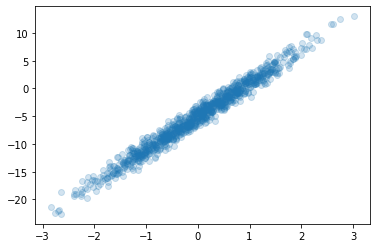

In [42]:
x, y = generate_data(N_EXAMPLES, BETA, INTERCEPT, NOISE)
plt.scatter(x, y, alpha=0.2);

In [43]:
W = tf.Variable(np.random.randn()) # rand init weights (slope)
B = tf.Variable(np.random.randn()) # rand init intercept
print(f'Loss: {loss(x, y, W, B):.5f}')

Loss: 64.57107


In [44]:
for step in range(EPOCHS):
    # direction and vluae of gradient of loss func wrt W and B
    dW, dB = grad(x, y, W, B)
    change_W = dW * ETA
    change_B = dB * ETA
    W.assign_sub(change_W) # e.g. W -= change_W
    B.assign_sub(change_B)
    if step % DISPLAY_STEP == 0:
        print(f'Loss: {loss(x, y, W, B)}')

Loss: 62.04856872558594


In [45]:
W.numpy(), B.numpy()

(5.196128, -4.319449)

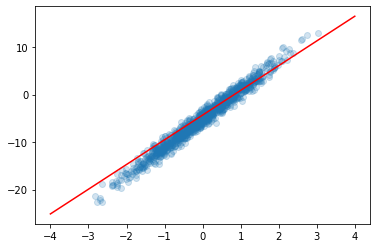

In [46]:
xv = np.linspace(-4, 4, 50)
yv = W.numpy()*xv + B.numpy()

plt.scatter(x, y, alpha=0.2)
plt.plot(xv, yv, 'r-');

# Boston Housing Data Set

In [144]:
ETA = 0.01
EPOCHS = 10000
DISPLAY = EPOCHS // 50
N_TRAIN = 300
N_VALID = 100

In [145]:
features, prices = load_boston(True)
N_TEST = len(features) - N_TRAIN - N_VALID
print(N_TEST)

106


In [146]:
scaled = scale(features)
train_features = tf.cast(scaled[:N_TRAIN], dtype=tf.float32)
train_prices = prices[:N_TRAIN]
valid_features = tf.cast(scaled[N_TRAIN:N_TRAIN + N_VALID],
                         dtype=tf.float32)
valid_prices = prices[N_TRAIN:N_TRAIN + N_VALID]
test_features = tf.cast(scaled[N_TRAIN + N_VALID:], dtype=tf.float32)
test_prices = prices[N_TRAIN + N_VALID:]

In [147]:
train_features.shape

TensorShape([300, 13])

In [148]:
def predict(x, w, b):
    return x @ w + b

In [149]:
def get_rmse(x, y, W, B):
    err = predict(x, W, B) - y
    sq_err = tf.square(err)
    return tf.sqrt(tf.reduce_mean(input_tensor=sq_err))

def get_loss(x, y, W, B):
    return get_rmse(x, y, W, B)

In [150]:
def gradient(x, y, W, B):
    with tf.GradientTape() as tape:
        loss = get_loss(x, y, W, B)
    return tape.gradient(loss, [W, B])

In [151]:
# Random init params
W = tf.Variable(
    tf.random.normal([13, 1], mean=0., stddev=1.), dtype=tf.float32)
B = tf.Variable(tf.zeros(1), dtype=tf.float32)
print(f'W: {W.numpy()}, B: {B.numpy()}')
print(f'Loss: {get_loss(train_features, train_prices, W, B)}')

W: [[ 2.2729251 ]
 [-0.84039676]
 [ 1.6202235 ]
 [ 2.2476997 ]
 [ 0.28329998]
 [-2.0683963 ]
 [-1.1206694 ]
 [-0.30142587]
 [-1.537448  ]
 [ 0.2996461 ]
 [ 0.4580654 ]
 [ 0.23954701]
 [ 0.14123495]], B: [0.]
Loss: 28.39984893798828


In [152]:
for e in range(EPOCHS):
    dW, dB = gradient(train_features, train_prices, W, B)
    change_W = dW * ETA
    change_B = dB * ETA
    W.assign_sub(change_W)
    B.assign_sub(change_B)
    if e % DISPLAY == 0:
        print(f'Validation Loss ({e + 1}): '
              f'{get_loss(train_features, train_prices, W, B)}')

Validation Loss (1): 28.37430763244629
Validation Loss (201): 23.745899200439453
Validation Loss (401): 20.074485778808594
Validation Loss (601): 17.262678146362305
Validation Loss (801): 15.132974624633789
Validation Loss (1001): 13.520711898803711
Validation Loss (1201): 12.315311431884766
Validation Loss (1401): 11.441380500793457
Validation Loss (1601): 10.83109188079834
Validation Loss (1801): 10.417025566101074
Validation Loss (2001): 10.138995170593262
Validation Loss (2201): 9.950361251831055
Validation Loss (2401): 9.8187255859375
Validation Loss (2601): 9.723121643066406
Validation Loss (2801): 9.650498390197754
Validation Loss (3001): 9.592878341674805
Validation Loss (3201): 9.545382499694824
Validation Loss (3401): 9.5050048828125
Validation Loss (3601): 9.469849586486816
Validation Loss (3801): 9.43868637084961
Validation Loss (4001): 9.410696029663086
Validation Loss (4201): 9.385302543640137
Validation Loss (4401): 9.362091064453125
Validation Loss (4601): 9.34074878692

In [164]:
example_house = 92
y = test_prices[example_house]
y_pred = predict(test_features, W.numpy(), B.numpy())[example_house]
print('Actual median house value ', y, ' in $10K')
print('Predicted mean house value ', y_pred.numpy(), ' in $10K')

Actual median house value  20.1  in $10K
Predicted mean house value  [22.598665]  in $10K
